<a href="https://colab.research.google.com/github/ChenshuLiu/Pytorch-Tutorial/blob/main/Pytorch_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Tutorial
#### By: Chenshu Liu
Reference: https://youtu.be/c36lUUr864M?list=PLw1A_xmFf3RLPk5cKf1PZo6-3E-boYifg 

In [3]:
import torch
import numpy as np

## Tensors Basics

* use `torch.empty(dimension)` to define an empty tensor object

In [3]:
x = torch.empty(2, 3)
print(x)

tensor([[8.6337e-34, 0.0000e+00, 3.5032e-44],
        [0.0000e+00,        nan, 0.0000e+00]])


* use `torch.rand(dimension)` to define a tensor with random numbers with given dimension

In [4]:
x = torch.rand(2, 2)
print(x)

tensor([[0.1364, 0.7621],
        [0.7713, 0.0085]])


* use `torch.ones(dimension, dtype)` to define tensor object with ones

In [5]:
x = torch.ones(2, 2, dtype = torch.double)
print(x)
print(x.dtype)
print(x.size())

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float64)
torch.float64
torch.Size([2, 2])


* use `torch.tensor([array of values])` to cast array of values into a tensor object

In [6]:
x = torch.tensor([2.5, 0.1])
print(x)

tensor([2.5000, 0.1000])


### Tensor Arithematics
* Addition `torch.add(a,b)`
* Subtraction `torch.sub(a,b)`
* Multiplication `torch.mul(a,b)`
* Division `torch.div(a,b)`
* For in-place modification, add an underscore `_` behind the operation name (i.e. `a.add_(b)` will add a to b and assigned the sum to a)
* Without `_` in the operation, the result need to be assigned to a new object (e.g. `c = a.add(b)`)

In [24]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)
# elementwise addition
z = x + y
#  or
z = torch.add(x, y)
print(x)
print(y)
print(z)

tensor([[0.6109, 0.4688],
        [0.5876, 0.3950]])
tensor([[0.5343, 0.4071],
        [0.7797, 0.0901]])
tensor([[1.1452, 0.8760],
        [1.3672, 0.4851]])


In [27]:
z = y.add(x)
print(x)
print(y)
print(z)
# in-place modification on y
y.add_(x)
print(y)

tensor([[0.6109, 0.4688],
        [0.5876, 0.3950]])
tensor([[1.7561, 1.3448],
        [1.9548, 0.8800]])
tensor([[2.3670, 1.8137],
        [2.5424, 1.2750]])
tensor([[2.3670, 1.8137],
        [2.5424, 1.2750]])


### Tensor Slicing

In [14]:
x = torch.rand(3, 3)
print(x[1, 1])
print(type(x[1, 1]))
# extract only value from the position
print(x[1, 1].item())
print(type(x[1, 1].item()))

tensor(0.9280)
<class 'torch.Tensor'>
0.9280080795288086
<class 'float'>


### Tensor Resizing
For unknown dimension, use `-1` and specify the other dimension (works the same in Numpy)

In [23]:
x = torch.rand(4, 4)
print(x.shape)
# -1 here is just a place-holder
y = x.view((-1, 8))
print(y.shape)

torch.Size([4, 4])
torch.Size([2, 8])


### Tensor and Numpy
The `torch.from_numpy()` function converts numpy array to tensor object, but the change is made in-place (i.e. modifying the numpy array will also modify the converted tensor)

In [6]:
a = np.ones(5)
b = torch.from_numpy(a)
print(type(a))
print(a)
print(type(b))
print(b)

# modify numpy will also alter tensor
a += 1
print(a)
print(b)

<class 'numpy.ndarray'>
[1. 1. 1. 1. 1.]
<class 'torch.Tensor'>
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd

To calculate gradient for the model with respect to several values (i.e. $x_1, \dots, x_n$) in preparation for the backward propagation, we use the `requires_grad = True` argument to keep track of the gradients.

reference:
1. Gradient: https://builtin.com/data-science/gradient-descent 

In [7]:
import torch

In [6]:
x = torch.randn(3, requires_grad = True)
print(x)

y = x+2
print(y) #backward gradient with addition -- "AddBackward0"
z = y*y*2 
print(z) #backward gradient with multiplication -- "MulBackward0"
z = z.mean() 
print(z) #backward gradient with mean operation -- "MeanBackward0"
z.backward()
print(x.grad) #the gradients with respect to the three x's

tensor([-1.0523,  0.5415,  0.9816], requires_grad=True)
tensor([0.9477, 2.5415, 2.9816], grad_fn=<AddBackward0>)
tensor([ 1.7963, 12.9187, 17.7795], grad_fn=<MulBackward0>)
tensor(10.8315, grad_fn=<MeanBackward0>)
tensor([1.2636, 3.3887, 3.9754])


By default, `requires_grad` has a False argument, so when we try to request for gradient with respect to the independent variables (i.e. $x_1, \dots, x_n$), there will be an error message.

In [9]:
x = torch.randn(3, requires_grad = False)
print(x)

y = x+2
print(y) #will not show backward gradient with addition -- "AddBackward0"
z = y*y*2 
print(z) #will not show backward gradient with multiplication -- "MulBackward0"
z = z.mean() 
print(z) #will not show backward gradient with mean operation -- "MeanBackward0"
z.backward() #will produce error because the gradients were not requested in x
# print(x.grad)

tensor([-0.2098, -0.7104, -1.0785])
tensor([1.7902, 1.2896, 0.9215])
tensor([6.4095, 3.3259, 1.6985])
tensor(3.8113)


RuntimeError: ignored

### Removing Gradients Tracking
Can remove the tracked gradients in the following ways:

* `tensorobj.requires_grad_(False)` (NOTE: any function with an underscore behind will modify the object in-place)

In [16]:
x = torch.randn(3, requires_grad = True)
print(x)
x.requires_grad_(False) #in-place modification
print(x)

tensor([ 0.8699,  0.5317, -0.7827], requires_grad=True)
tensor([ 0.8699,  0.5317, -0.7827])


* `tensorobj.detach`

In [20]:
x = torch.randn(3, requires_grad = True)
print(x)
y = x.detach() #does not modify in-place
print(y)

tensor([-1.0555,  0.7687,  0.2573], requires_grad=True)
tensor([-1.0555,  0.7687,  0.2573])


* Perform operations within a `with` statement: `with torch.no_grad(): blahblahblah`

In [21]:
x = torch.randn(3, requires_grad = True)
print(x)
with torch.no_grad():
  y = x+2
  print(y)

tensor([ 0.6684, -1.3532,  1.0301], requires_grad=True)
tensor([2.6684, 0.6468, 3.0301])


### Gradients Accumulation During Epochs

In [22]:
weights = torch.ones(4, requires_grad = True)

for epoch in range(3):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


Note that in the three epochs, the gradients are accumulated. This is because the `backward` function will accumulate the gradients from the previous iteration. However, this is NOT what we want for model training (i.e. iterating through multiple epochs). Thus, we need to use the `grad.zero_()` function to modify the tracked gradients at the end of one epoch to restart the tracking.

In [23]:
weights = torch.ones(4, requires_grad = True)
for epoch in range(3):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)
  weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


Now, the gradients in every epoch seems right (i.e. we shouldn't expect any change in the gradients because the model stayed the same)

## Backpropagation

### Chain Rule
Chain rule is the foundation of determining the gradient of loss with respect to the independent variables: $\frac{\partial \mathcal{L}}{\partial x}$.

For input $x$ passing through an operation $a(x)$ getting $y$, and then passing through operation $b(y)$ to get $z$, the chain rule to find the gradient $\frac{\partial z}{\partial x}$ can be calculated as:
$$\frac{\partial z}{\partial x} = \frac{\partial z}{\partial y} \cdot \frac{\partial y}{\partial x}$$

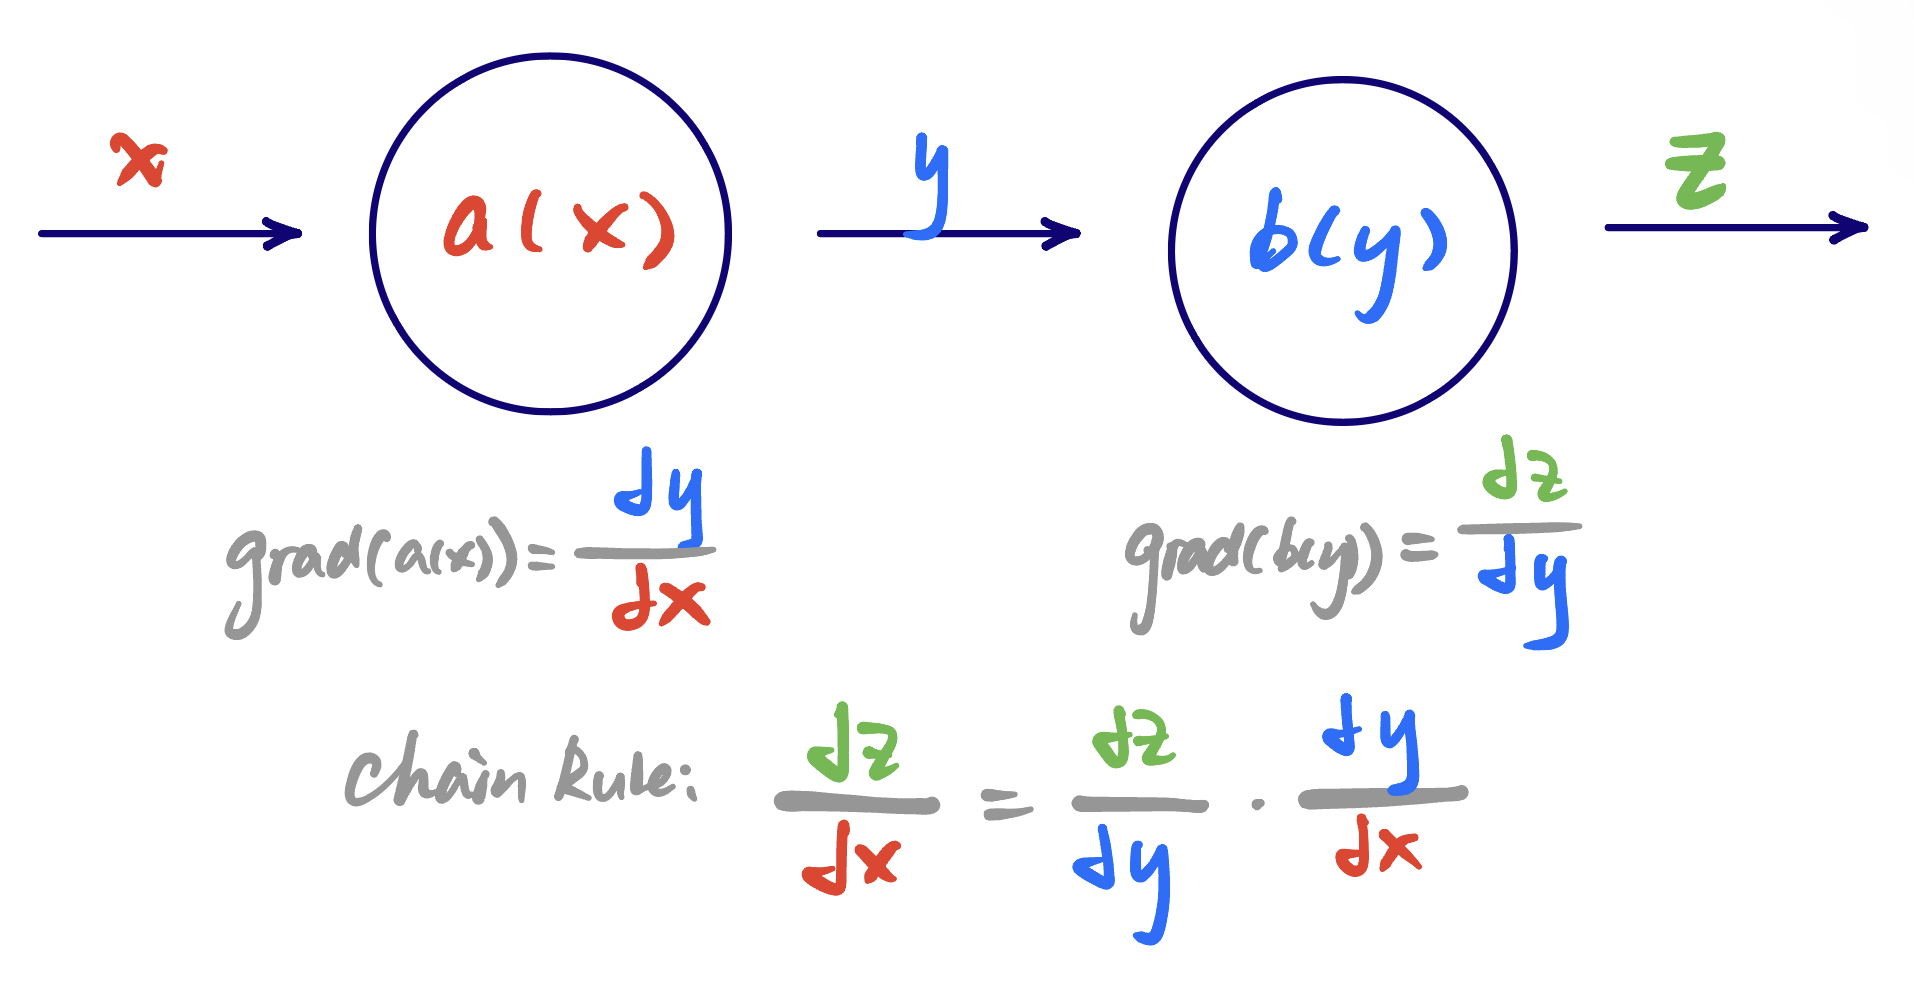

### Model Architecture: Forward and Backward Prop
When constructing models, we first follow the forward propagation (i.e. carrying out the operations in each step), then use the calculated values in the backward propagation that utilizes the chain rule to find the gradient $\frac{\partial loss}{\partial w}$ because we are interested in how the weights affect loss, which helps us determine how to tune the weights to minimize losses.

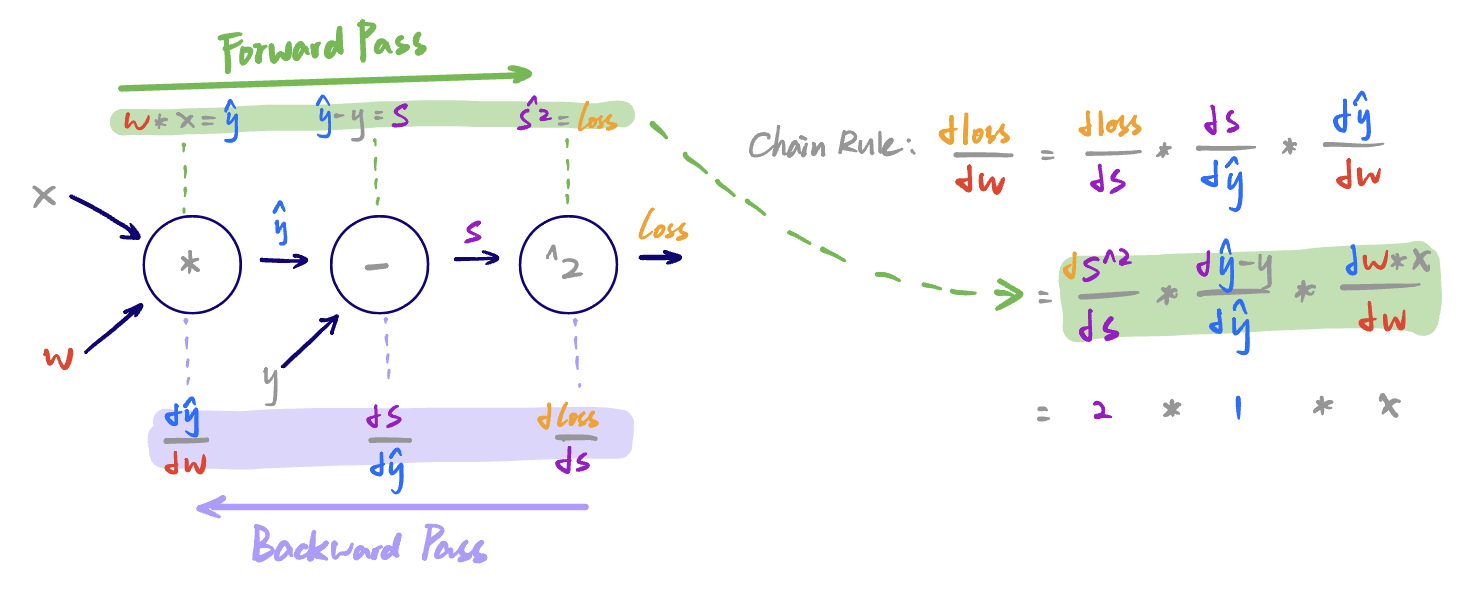

### Code Realization in Pytorch
When realizing the gradient tracking in Pytorch, we can directly use the `.backward()` function which automatically keeps track of the gradients, so we don't have to manually apply the chain rule, etc.

In [31]:
import torch
x = torch.tensor(1.0)
y = torch.tensor(2.0)
init_weight = torch.tensor(1.0, requires_grad = True) #interested in the gradient w.r.t to weights

# Forward pass
y_hat = init_weight * x
loss = (y_hat - y)**2
print(loss)

# Backward pass
loss.backward()
print(f"The gradients of loss w.r.t initial weights is:", init_weight.grad)

tensor(1., grad_fn=<PowBackward0>)
The gradients of loss w.r.t initial weights is: tensor(-2.)


## Pytorch Modeling Implementation

The general modeling process in machine learning includes the following steps:
1. Design model (input size, output size, forward pass structure)
2. Construct loss and optimizer
3. Training (epochs)
  - forward pass: compute prediction and loss
  - backward pass: compute gradients (automated with autograd in pytorch)
  - update weights with learning rate and gradient

### Realization Using Only Numpy

In [47]:
import numpy as np

x = np.array([1, 2, 3, 4], dtype = np.float32)
y = np.array([2, 4, 6, 8], dtype = np.float32)

w = 0.0

def forward(x):
  return w * x

def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

def gradient(x, y, y_pred):
  return np.dot(2*x, (y_pred - y)).mean()

lr = 0.01
n_iters = 10

for epoch in range(n_iters):
  y_pred = forward(x)
  l = loss(y, y_pred)
  dw = gradient(x, y, y_pred)
  # gradient descent
  w -= lr * dw

  if epoch % 1 == 0:
    print(f'epoch {epoch+1}: w = {w:.2f}, loss = {l:.8f}')

print(f"The predictions after training are: {forward(x)}")

epoch 1: w = 1.20, loss = 30.00000000
epoch 2: w = 1.68, loss = 4.79999924
epoch 3: w = 1.87, loss = 0.76800019
epoch 4: w = 1.95, loss = 0.12288000
epoch 5: w = 1.98, loss = 0.01966083
epoch 6: w = 1.99, loss = 0.00314574
epoch 7: w = 2.00, loss = 0.00050331
epoch 8: w = 2.00, loss = 0.00008053
epoch 9: w = 2.00, loss = 0.00001288
epoch 10: w = 2.00, loss = 0.00000206
The predictions after training are: [1.9997903 3.9995806 5.999371  7.9991612]


### Realization Using Pytorch (Autograd)
When realizing the linear regression training in Pytorch, with the help of autograd. The autograd can replace the `gradient` function defined in the Numpy realization with `.backward()` function. So the gradient `dw` is replaced by `w.grad`.

NOTE: the weight updating step should be carried out outside of autograd (because it is not part of the model formulation)

In [50]:
import torch

x = torch.tensor([1, 2, 3, 4], dtype = torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype = torch.float32)

# using autograd to keep track of gradient of weights
w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

def forward(x):
  return w * x

def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

lr = 0.01
n_iters = 10

for epoch in range(n_iters):
  y_pred = forward(x)
  l = loss(y, y_pred)
  l.backward()
  # gradient descent
  with torch.no_grad():
    # don't want the weight update in the computation map
    w -= lr * w.grad

  # need to clear the gradients dw
  w.grad.zero_()

  if epoch % 1 == 0:
    print(f'epoch {epoch+1}: w = {w:.2f}, loss = {l:.8f}')

print(f"The predictions after training are: {forward(x)}")

epoch 1: w = 0.30, loss = 30.00000000
epoch 2: w = 0.55, loss = 21.67499924
epoch 3: w = 0.77, loss = 15.66018772
epoch 4: w = 0.96, loss = 11.31448650
epoch 5: w = 1.11, loss = 8.17471695
epoch 6: w = 1.25, loss = 5.90623236
epoch 7: w = 1.36, loss = 4.26725292
epoch 8: w = 1.46, loss = 3.08308983
epoch 9: w = 1.54, loss = 2.22753215
epoch 10: w = 1.61, loss = 1.60939169
The predictions after training are: tensor([1.6063, 3.2125, 4.8188, 6.4250], grad_fn=<MulBackward0>)


### Realization Using Pytorch (Optimization & Loss & Modeling)
* The `torch.nn` (torch neural network) library can assist with loss, so we don't need to manually define the loss function anymore.

* The `torch.nn` library also contain pre-built models, such as linear regression. So, the manually defined `forward()` function is no longer needed. However, the linear regression function in Pytorch takes 2D array, so we need to modify the shape of the input and output.

* The `torch.optim` module can help with optimization.

In [11]:
import torch
import torch.nn as nn

x = torch.tensor([[1], [2], [3], [4]], dtype = torch.float32)
y = torch.tensor([[2], [4], [6], [8]], dtype = torch.float32)
x_test = torch.tensor([5], dtype = torch.float32)
n_samples, n_features = x.shape
input_size = n_features
output_size = n_features
model = nn.Linear(input_size, output_size)

lr = 0.01
n_iters = 10
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

for epoch in range(n_iters):
  y_pred = model(x)
  l = loss(y, y_pred)
  # find the gradients
  l.backward()
  # gradient descent with built-in optimizer
  optimizer.step()

  # need to clear the gradients of parameters
  optimizer.zero_grad()
  # unpack the parameters
  w, b = model.parameters()
  if epoch % 1 == 0:
    print(f'epoch {epoch+1}: w = {w[0][0]:.2f}, loss = {l:.8f}')

print(f"The predictions after training are: {model(x_test).item():.3f}")

epoch 1: w = -0.21, loss = 43.70426178
epoch 2: w = 0.09, loss = 30.39871407
epoch 3: w = 0.34, loss = 21.16583252
epoch 4: w = 0.55, loss = 14.75889874
epoch 5: w = 0.73, loss = 10.31282806
epoch 6: w = 0.87, loss = 7.22736597
epoch 7: w = 1.00, loss = 5.08599949
epoch 8: w = 1.10, loss = 3.59972715
epoch 9: w = 1.18, loss = 2.56801128
epoch 10: w = 1.25, loss = 1.85170519
The predictions after training are: 7.323


## Linear Regression Implementation Example in Pytorch

epoch: 1, loss = 5823.1343
epoch: 11, loss = 4311.9707
epoch: 21, loss = 3219.4412
epoch: 31, loss = 2428.6848
epoch: 41, loss = 1855.7493
epoch: 51, loss = 1440.2325
epoch: 61, loss = 1138.6139
epoch: 71, loss = 919.4919
epoch: 81, loss = 760.1817
epoch: 91, loss = 644.2766


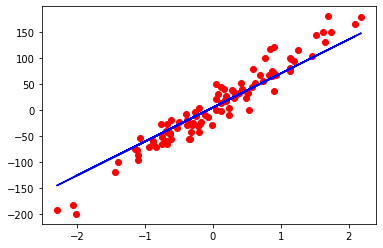

In [17]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# data
X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
# make a column vector
y = y.view(y.shape[0], 1)
n_samples, n_features = X.shape

# model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# loss and optimizer
learning_rate = 0.01
Loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# training
epochs = 100
for epoch in range(epochs):
  y_pred = model(X)
  loss = Loss(y_pred, y)
  grad = loss.backward()
  # update parameters with gradients
  optimizer.step()
  optimizer.zero_grad()

  if epoch % 10 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# need to detach so the model() operation on x is not tracked by computation graph
predict = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predict, 'b')
plt.show()
